<a href="https://colab.research.google.com/github/vivi1231/0824/blob/master/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test)= load_data() 

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [5]:
trans = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck"
]

dog


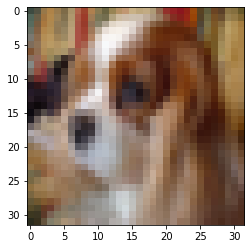

In [7]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
i = random.randint(0, 4999)
print(trans[y_train[i][0]])
plt.imshow(x_train[i])

In [30]:
# 通常kernel_size
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout #Dense中間可加Dropout(為預防意外狀況)，若意外狀況多，也適當加Dropout，一定機率(25%-50%)丟棄神經元;若沒啥意外不加也行。
from tensorflow.keras.models import Sequential
layers = [
    #1792 = 3*3*3(個過濾器)*64(個)+64(個bias) 
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32,32,3)),
    MaxPooling2D(),
    # 73856 = 3*3*64(個過濾器)*128(個)+128(個bias)
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.25),
    Dense(10, activation="softmax")

]
model = Sequential(layers)
model.summary()



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4096)             

In [31]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer="Adam",
       metrics=["accuracy"])

In [32]:
x_train_norm = x_train/255
x_test_norm = x_test/255

In [33]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)       
]
model.fit(x_train_norm, 
     y_train, 
     batch_size=200,
     validation_split=0.1,
     epochs=50,
     verbose=2, # =1:進度條
     callbacks=callbacks)

Epoch 1/50
225/225 - 3s - loss: 1.6854 - accuracy: 0.3830 - val_loss: 1.3311 - val_accuracy: 0.5076
Epoch 2/50
225/225 - 3s - loss: 1.2179 - accuracy: 0.5644 - val_loss: 1.0513 - val_accuracy: 0.6430
Epoch 3/50
225/225 - 3s - loss: 1.0107 - accuracy: 0.6466 - val_loss: 0.8620 - val_accuracy: 0.6982
Epoch 4/50
225/225 - 3s - loss: 0.8745 - accuracy: 0.6933 - val_loss: 0.8392 - val_accuracy: 0.7040
Epoch 5/50
225/225 - 3s - loss: 0.7715 - accuracy: 0.7305 - val_loss: 0.7388 - val_accuracy: 0.7418
Epoch 6/50
225/225 - 3s - loss: 0.6830 - accuracy: 0.7604 - val_loss: 0.7393 - val_accuracy: 0.7522
Epoch 7/50
225/225 - 3s - loss: 0.6164 - accuracy: 0.7838 - val_loss: 0.6652 - val_accuracy: 0.7714
Epoch 8/50
225/225 - 3s - loss: 0.5421 - accuracy: 0.8092 - val_loss: 0.6829 - val_accuracy: 0.7630
Epoch 9/50
225/225 - 3s - loss: 0.4853 - accuracy: 0.8285 - val_loss: 0.6820 - val_accuracy: 0.7704
Epoch 10/50
225/225 - 3s - loss: 0.4225 - accuracy: 0.8500 - val_loss: 0.7089 - val_accuracy: 0.7700

In [34]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7161 - accuracy: 0.7534


[0.7161065340042114, 0.7534000277519226]

In [35]:
pre = model.predict_classes(x_test_norm)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 8, 8, ..., 5, 1, 7])

In [36]:
print(pre.shape)
print(y_test.shape)
y_test_reshape = y_test.reshape(-1)
print(y_test_reshape.shape)

(10000,)
(10000, 1)
(10000,)


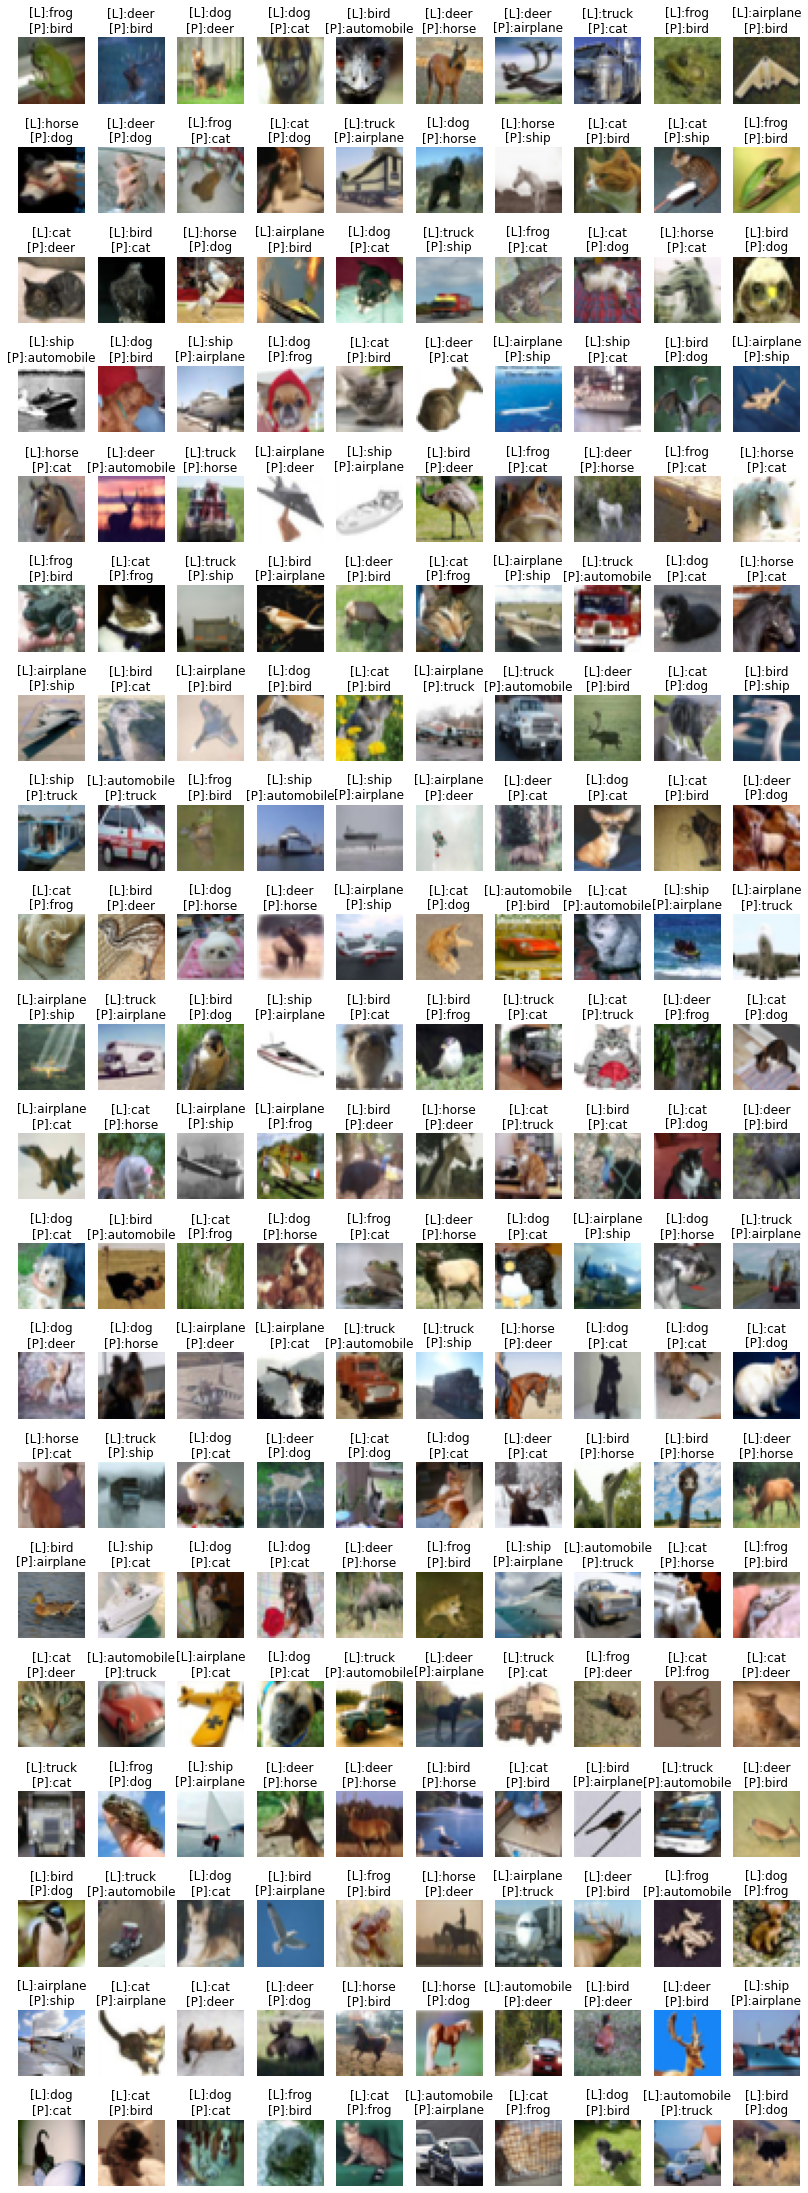

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14, 42))
idx = np.nonzero(pre != y_test_reshape)[0]
idx = idx[:200]
width = 10
height = len(idx) // width + 1
for i, d  in enumerate(idx):
    img, label, p = x_test[d], y_test_reshape[d], pre[d]
    t = "[L]:{}\n[P]:{}".format(trans[label], trans[p])
    plt.subplot(height, width, i+1)
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)

請輸入網址:https://image.cache.storm.mg/styles/smg-800x533-fp/s3/media/image/2020/01/31/20200131-052418_U17017_M588719_cd2e.jpg?itok=s0SyFjTD
airplane 的機率: 0.0
automobile 的機率: 0.0
bird 的機率: 0.0
cat 的機率: 0.75
deer 的機率: 0.03
dog 的機率: 0.13
frog 的機率: 0.01
horse 的機率: 0.05
ship 的機率: 0.0
truck 的機率: 0.02


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


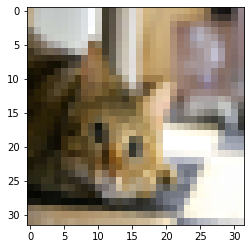

In [40]:
import requests
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img

url = input("請輸入網址:")
# 純文字: stream不加，檔案:stream=True
# verify=False 防火牆降低

response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw).resize((32, 32))
img = np.array(img)
img_np = np.array(img).reshape(1, 32, 32, 3) / 255
pre = model.predict(img_np)[0]
for i in range(10):
    print(trans[i], "的機率:", round(pre[i], 2))
plt.imshow(np.array(img), cmap="Reds")
